In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
# Only get data analyst jobs in Canada
df_DA_CAN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

# Drop Nan values from the column.
df_DA_CAN = df_DA_CAN.dropna(subset=['salary_year_avg'])

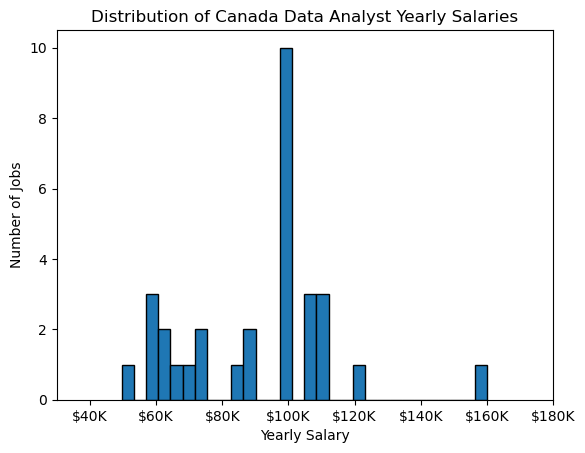

In [17]:
df_DA_CAN['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(30000,180000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Canada Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()